In [ ]:
#Import necessary pkg
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
X=[[5,1],[7,3],[3,2],[5,4],[0,0],[-1,-3],[-2,3],[-3,0]]
Y=[0,0,0,0,1,1,1,1]

We can look at the groups. It seems they are linearly separable from the first glance

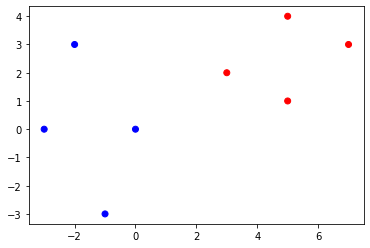

In [ ]:
c = ['r' if i==0 else 'b' for i in Y]
plt.scatter([i[0] for i in X],[ i[1] for i in X], c=c)

Now tutorial question wishes to find centroids of two classes.

Define a simple functiont to calculate sq distance from source

In [ ]:
def sq_dist(source, target):
  diff = np.array(source) - np.array(target)
  sum=0
  for i in diff:
    sum=sum+i*i
  
  return sum


Define a cost function (total sq distance from source)

In [ ]:
def cost_func(input,init_centroid):
  c = init_centroid
  total_dist=0
  for i in input:
    total_dist=total_dist+sq_dist(c,i)

  return total_dist


  

To minimise it, we require:

x_c→x_c+sum(x_i-x_c)*alpha

y_c→y_c+sum(y_i-y_c)*alpha

In [ ]:
def step(c,input,alpha):
  c[0]=c[0]+sum([i[0]-c[0] for i in input])*alpha
  c[1]=c[1]+sum([i[1]-c[1] for i in input])*alpha
  return c

Hyper-parameter definition

In [ ]:
EPOCH = 100
alpha = 0.01
init_c=[0,0]


Centroid of first class

In [ ]:
for i in range(EPOCH):
  class_1=X[0:4]
  new_c = step(init_c, class_1, alpha)
  if i%10 == 0:
    print("Epoch No.",str(i)," Cost: ", cost_func(class_1,new_c))

print("Centroid: ", new_c)

Epoch No. 0  Cost:  128.2
Epoch No. 10  Cost:  63.918680382907766
Epoch No. 20  Cost:  35.5061806591729
Epoch No. 30  Cost:  22.947786628684067
Epoch No. 40  Cost:  17.39694590159138
Epoch No. 50  Cost:  14.943460790139474
Epoch No. 60  Cost:  13.859014399390842
Epoch No. 70  Cost:  13.37968645526821
Epoch No. 80  Cost:  13.167822337339594
Epoch No. 90  Cost:  13.074177881563433
Centroid:  [4.915648403205752, 2.457824201602876]


Centroid of second class

In [ ]:
for i in range(EPOCH):
  class_1=X[4:]
  new_c = step(init_c, class_1, alpha)
  if i%10 == 0:
    print("Epoch No.",str(i)," Cost: ", cost_func(class_1,new_c))

print("Centroid: ", new_c)

Epoch No. 0  Cost:  197.0034040446452
Epoch No. 10  Cost:  99.90992809103516
Epoch No. 20  Cost:  56.99437540572778
Epoch No. 30  Cost:  38.02559666754196
Epoch No. 40  Cost:  29.641350297543866
Epoch No. 50  Cost:  25.935492995760118
Epoch No. 60  Cost:  24.297495048761924
Epoch No. 70  Cost:  23.573495969499252
Epoch No. 80  Cost:  23.253486614338698
Epoch No. 90  Cost:  23.11204170049356
Centroid:  [-1.3917659625438252, 0.04146427920895018]


Cool, now we find the gradient of the line that passes through the centroid

In [ ]:
c1=[5,2.5]
c2=[-1.5,0]

a=(c1[1]-c2[1])/(c1[0]-c2[0])
print("gradient: ", a)

gradient:  0.38461538461538464


... And the line perpandicular to it (while passing through the midddle point)


In [ ]:
mid=[(c1[0]+c2[0])/2,(c1[1]+c2[1])/2]
print("Mid-point: ",mid)
a_prime=-1/a
b_prime=mid[1]-mid[0]*a_prime
print("y=",a_prime, "x+ ",b_prime)


Mid-point:  [1.75, 1.25]
y= -2.5999999999999996 x+  5.799999999999999


Classification using a perceptron

First, the data:

In [ ]:
x_train = np.array([[-1.75, 0.34, 1.15],
     [-0.25, 0.98, 0.51],
     [0.22, -1.07, -0.19],
     [0.26, -0.46, 0.44],
     [-0.58, 0.82, 0.67],
     [-0.1, -0.53, 1.03],
     [-0.44, -1.12, 1.62],
     [1.54, -0.25, -0.84],
     [0.18, 0.94, 0.73],
     [1.36, -0.33, 0.06]])
y_train = np.array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
class Neuron:
  def __init__(self,init_w,init_b):
    self.w=init_w
    self.b=init_b

  def compute(self,input):
    y=tf.tensordot(input,self.w,axes=1)+self.b
    y=1/(math.e**(-1*y)+1)
    return y

  def set_w(self,w):
    self.w=w

  def set_b(self,b):
    self.b=b


In [ ]:
def getclass(y):
  if y<=0.5:
    return 0
  else:
    return 1

In [ ]:
def cost(output,target):
  return -(target*math.log(output)+(1-target)*math.log(1-output))

In [ ]:
def loss(neuron, alpha, input, target):
  y = neuron.compute(input)

  r1=tf.tensordot(tf.transpose(input),(target-y),axes=1)
  r2=tf.tensordot(tf.transpose(y),(tf.fill(y.shape,1.0)-y),axes=1)
  w = neuron.w+tf.reshape(tf.tensordot(r1,r2,axes=0),neuron.w.shape)

  r1=tf.tensordot(tf.transpose(y),(tf.fill(y.shape,1.0)-y),axes=1)
  b = neuron.b+tf.reshape(tf.tensordot(alpha*(target-y),r1,axes=0),neuron.b.shape)
  
  neuron.set_w(w)
  neuron.set_b(b)

  output = neuron.compute(input)

  sum=0
  for i in range(len(output)):
    sum=sum+cost(output[i],target[i])

  return sum

Define hyper-parameter

In [ ]:
EPOCH = 1000
alpha = 0.4
init_b=tf.convert_to_tensor([0.77,0.02,0.63],tf.float32)
init_c=tf.convert_to_tensor([0.0])

In [ ]:
N=Neuron(init_b,init_c)
SGDLoss=[]
for e in range(EPOCH):
  i = random.randint(0,7)
  input = tf.reshape(tf.convert_to_tensor(x_train[i],tf.float32),(1,3))
  target= tf.reshape(tf.convert_to_tensor(y_train[i],tf.float32),(1,))
  SGDLoss.append(loss(N,alpha,input,target))
  if e%100==0:
    print("Epoch No.",e,"Loss: ",SGDLoss[len(SGDLoss)-1])

Epoch No. 0 Loss:  tf.Tensor(0.45630705, shape=(), dtype=float32)
Epoch No. 100 Loss:  tf.Tensor(0.26122493, shape=(), dtype=float32)
Epoch No. 200 Loss:  tf.Tensor(0.21406381, shape=(), dtype=float32)
Epoch No. 300 Loss:  tf.Tensor(0.24214032, shape=(), dtype=float32)
Epoch No. 400 Loss:  tf.Tensor(0.63336706, shape=(), dtype=float32)
Epoch No. 500 Loss:  tf.Tensor(0.282074, shape=(), dtype=float32)
Epoch No. 600 Loss:  tf.Tensor(0.29670477, shape=(), dtype=float32)
Epoch No. 700 Loss:  tf.Tensor(0.32976943, shape=(), dtype=float32)
Epoch No. 800 Loss:  tf.Tensor(0.1903965, shape=(), dtype=float32)
Epoch No. 900 Loss:  tf.Tensor(0.0032023152, shape=(), dtype=float32)


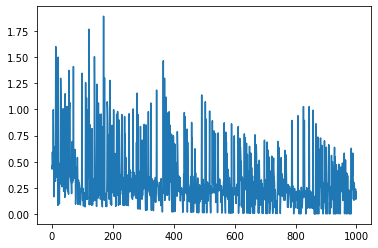

In [ ]:
plt.plot([i for i in range (len(SGDLoss))],SGDLoss)
plt.show()

For GD

In [ ]:
EPOCH = 100
alpha = 0.04
init_b=tf.convert_to_tensor([0.77,0.02,0.63],tf.float32)
init_c=tf.convert_to_tensor([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

In [ ]:
N=Neuron(init_b,init_c)
GDLoss=[]
for e in range(EPOCH):
  GDLoss.append(loss(N,alpha,tf.convert_to_tensor(x_train,tf.float32),tf.convert_to_tensor(y_train,tf.float32)))
  if e%10==0:
    print("Epoch No.",e,"Loss: ",GDLoss[len(GDLoss)-1])

Epoch No. 0 Loss:  tf.Tensor(3.9987745, shape=(), dtype=float32)
Epoch No. 10 Loss:  tf.Tensor(3.180918, shape=(), dtype=float32)
Epoch No. 20 Loss:  tf.Tensor(2.8743834, shape=(), dtype=float32)
Epoch No. 30 Loss:  tf.Tensor(2.4115765, shape=(), dtype=float32)
Epoch No. 40 Loss:  tf.Tensor(2.0337806, shape=(), dtype=float32)
Epoch No. 50 Loss:  tf.Tensor(1.7293513, shape=(), dtype=float32)
Epoch No. 60 Loss:  tf.Tensor(1.5308887, shape=(), dtype=float32)
Epoch No. 70 Loss:  tf.Tensor(1.4019191, shape=(), dtype=float32)
Epoch No. 80 Loss:  tf.Tensor(1.2967083, shape=(), dtype=float32)
Epoch No. 90 Loss:  tf.Tensor(1.208181, shape=(), dtype=float32)


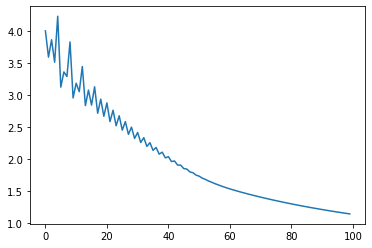

In [ ]:
plt.plot([i for i in range (len(GDLoss))],GDLoss)
plt.show()